<a href="https://colab.research.google.com/github/Hasti522004/AI_ML_Codes/blob/main/Copy_of_lab_4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# transitional variability - same size but position is change then nueral network is not work properly
# distance is more or less then also neural network is not prefere - feature map is different
# in place of nueral network we can use CNN for Image for solve above Problem

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import keras
from keras.datasets import fashion_mnist

In [5]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


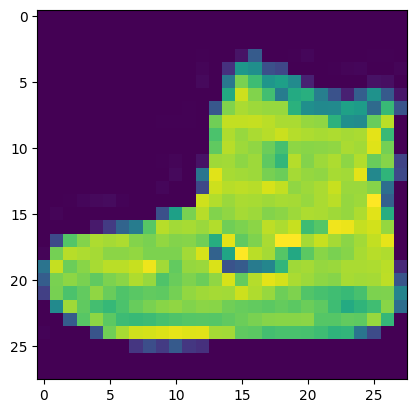

In [6]:
plt.imshow(train_x[0])

In [7]:
train_y[0]

9

In [8]:
train_x.shape

(60000, 28, 28)

In [9]:
#preprocessing
#resizing to the 3rd dimension of the image
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [10]:
train_x.shape

(60000, 28, 28, 1)

In [11]:
#normalize the pixel values
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x/255
test_x = test_x/255

In [12]:
from tensorflow.keras.utils import to_categorical
train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)

In [13]:
#model training
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y_onehot,test_size=0.25)

In [14]:
print(train_x.shape)
print(valid_x.shape)


(45000, 28, 28, 1)
(15000, 28, 28, 1)


In [15]:
epochs = 2
batch_size = 64
num_classes = 10

In [16]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,LeakyReLU
import tensorflow as tf

In [17]:
model = tf.keras.Sequential()

In [18]:
#1st Hidden Layers
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding="same"))
model.add(LeakyReLU(0.1)) # 0.1 is a negative slope
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
#2st Hidden Layers
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding="same"))
model.add(LeakyReLU(0.1)) # 0.1 is a negative slope
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
#3rd Hidden Layers
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding="same"))
model.add(LeakyReLU(0.1)) # 0.1 is a negative slope
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(tf.keras.layers.Flatten())

In [22]:
model.add(tf.keras.layers.Dense(128,))

In [23]:
model.add(LeakyReLU(0.1))
#output layer --> softmax Activation Function
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [24]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics = ['accuracy'])

In [25]:
model_train=model.fit(train_x, train_y, batch_size=64,epochs=20,verbose=1,validation_data=(valid_x, valid_y))

Epoch 1/20
704/704 [==============================] - 71s 99ms/step - loss: 0.4854 - accuracy: 0.8221 - val_loss: 0.3643 - val_accuracy: 0.8652
Epoch 2/20
704/704 [==============================] - 70s 100ms/step - loss: 0.3003 - accuracy: 0.8900 - val_loss: 0.3323 - val_accuracy: 0.8812
Epoch 3/20
704/704 [==============================] - 72s 102ms/step - loss: 0.2501 - accuracy: 0.9085 - val_loss: 0.2739 - val_accuracy: 0.9013
Epoch 4/20
704/704 [==============================] - 70s 100ms/step - loss: 0.2205 - accuracy: 0.9187 - val_loss: 0.2609 - val_accuracy: 0.9050
Epoch 5/20
704/704 [==============================] - 74s 105ms/step - loss: 0.1944 - accuracy: 0.9279 - val_loss: 0.2488 - val_accuracy: 0.9101
Epoch 6/20
704/704 [==============================] - 76s 108ms/step - loss: 0.1716 - accuracy: 0.9376 - val_loss: 0.2416 - val_accuracy: 0.9134
Epoch 7/20
704/704 [==============================] - 70s 100ms/step - loss: 0.1487 - accuracy: 0.9448 - val_loss: 0.2455 - val_acc

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [27]:
test_eval = model.evaluate(test_x, test_y_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.47363364696502686
Test accuracy: 0.9115999937057495


In [28]:
test_eval = model.evaluate(test_x, test_y_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.47363364696502686
Test accuracy: 0.9115999937057495
